---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---

## 1. Importing Necessary Libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

## Download the dataset from there <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv" >click here </a>  

Use : [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

print("First 5 rows of the dataset:")
display(df.head())



First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### EXPLORE THE DATA

**Print the columns**

In [3]:
# Print all column names in the dataset
print("Column Names in the Dataset:")
print(df.columns.tolist())


Column Names in the Dataset:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


**Print the shape and description**

In [6]:
print(df.shape)


(284807, 31)


In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

**Verify the absence of null values**

Use `data = data.dropna()`,if any.

In [10]:
# Check for null values in the dataset
print("Null values in each column:")
print(df.isnull().sum())

# Drop any rows with null values if found
df = df.dropna()

# Confirm again after dropping
print("\nAfter dropping nulls:")
print(df.isnull().sum())


Null values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

After dropping nulls:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Data Visualization

Plot the histograms of each parameter, using .hist() in Matplotlib, and ultimately plt.show(). Learn more about how to do this, by searching online. Note, this is a straightforward code taking no more than 2 lines.

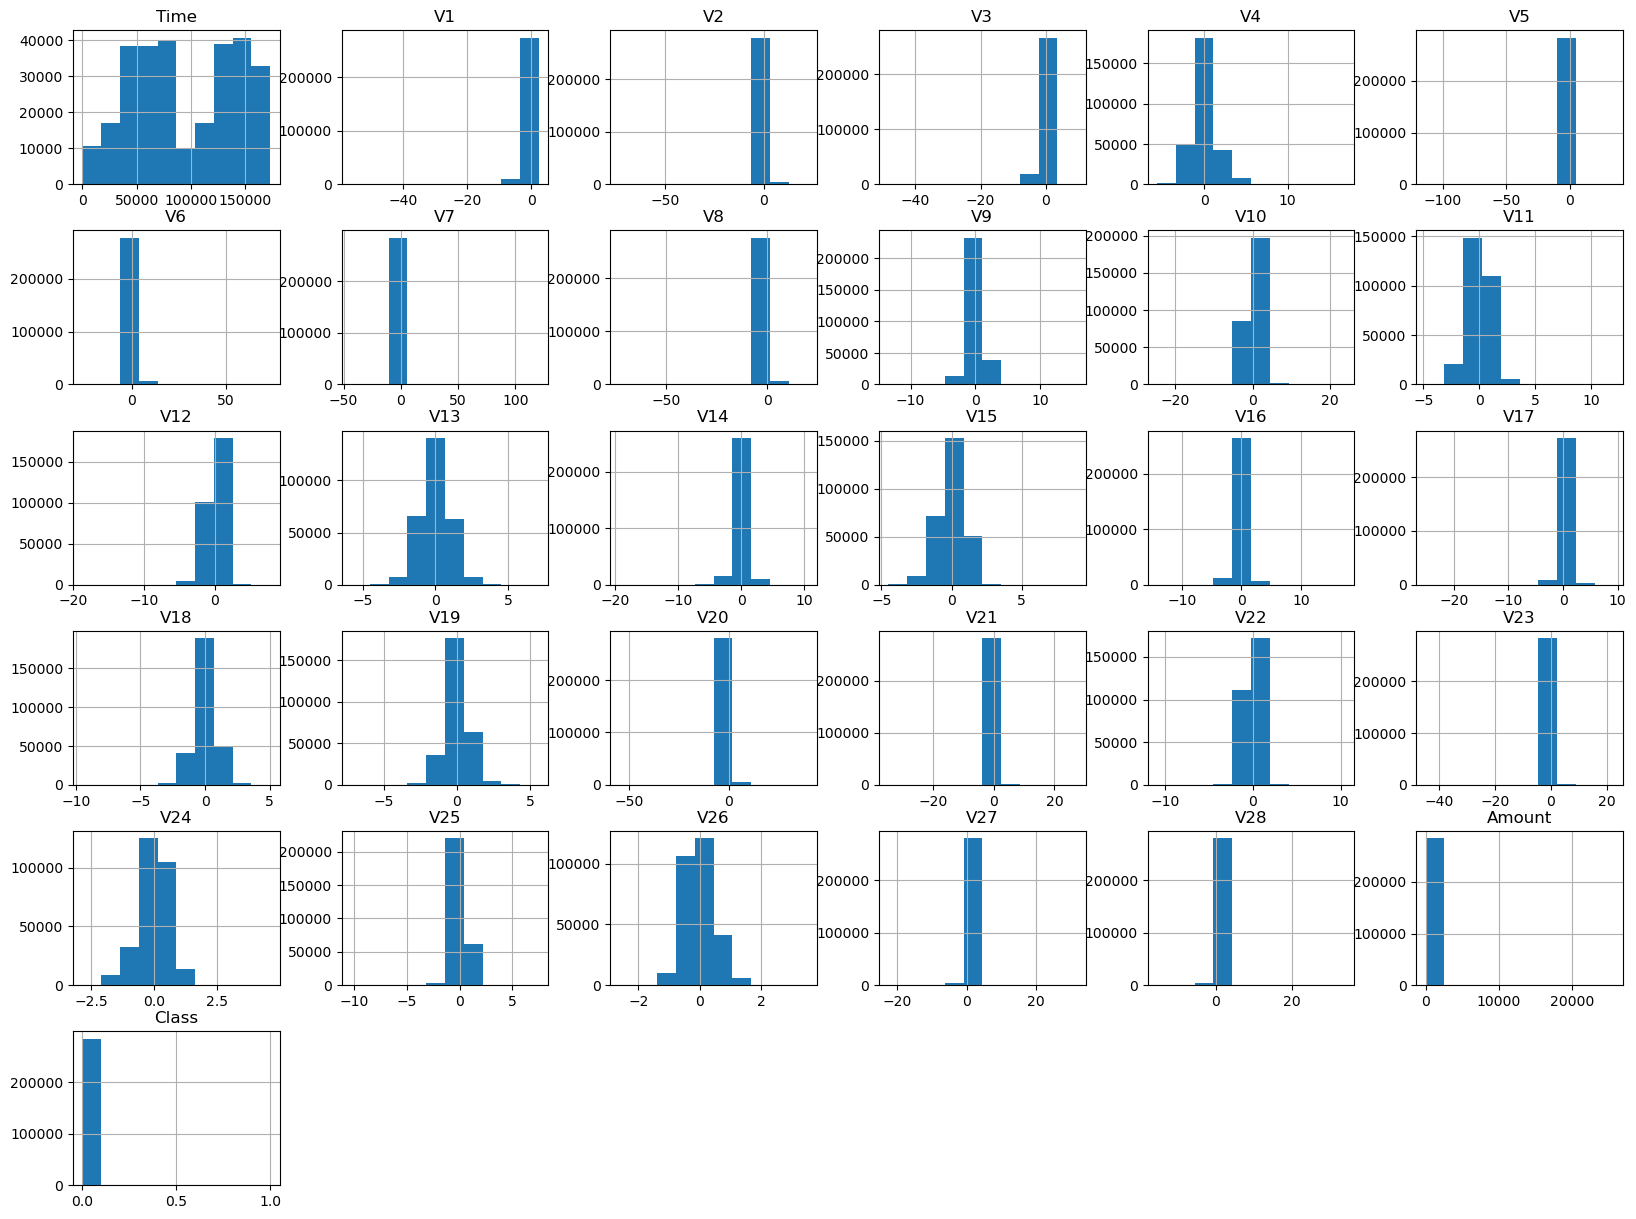

In [11]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15))  # You can adjust figsize as needed
plt.show()


**Print the number of**
  1. **Fraud cases**
  2.**Valid Cases**   **from the dataset**

  Do this part by **Boolean Indexing**.


In [12]:
# Count fraud and valid cases using boolean indexing
fraud_cases = df[df['Class'] == 1]
valid_cases = df[df['Class'] == 0]

print("Number of Fraud Cases:", len(fraud_cases))
print("Number of Valid Cases:", len(valid_cases))


Number of Fraud Cases: 492
Number of Valid Cases: 284315


**Plot a correlation heatmap using the Seaborn Library(Example)**

Search these up.

1.   pandas.DataFrame.corr
2.   seaborn.heatmap
3.   matplotlib.pyplot.figure
4.   matplotlib.pyplot.show












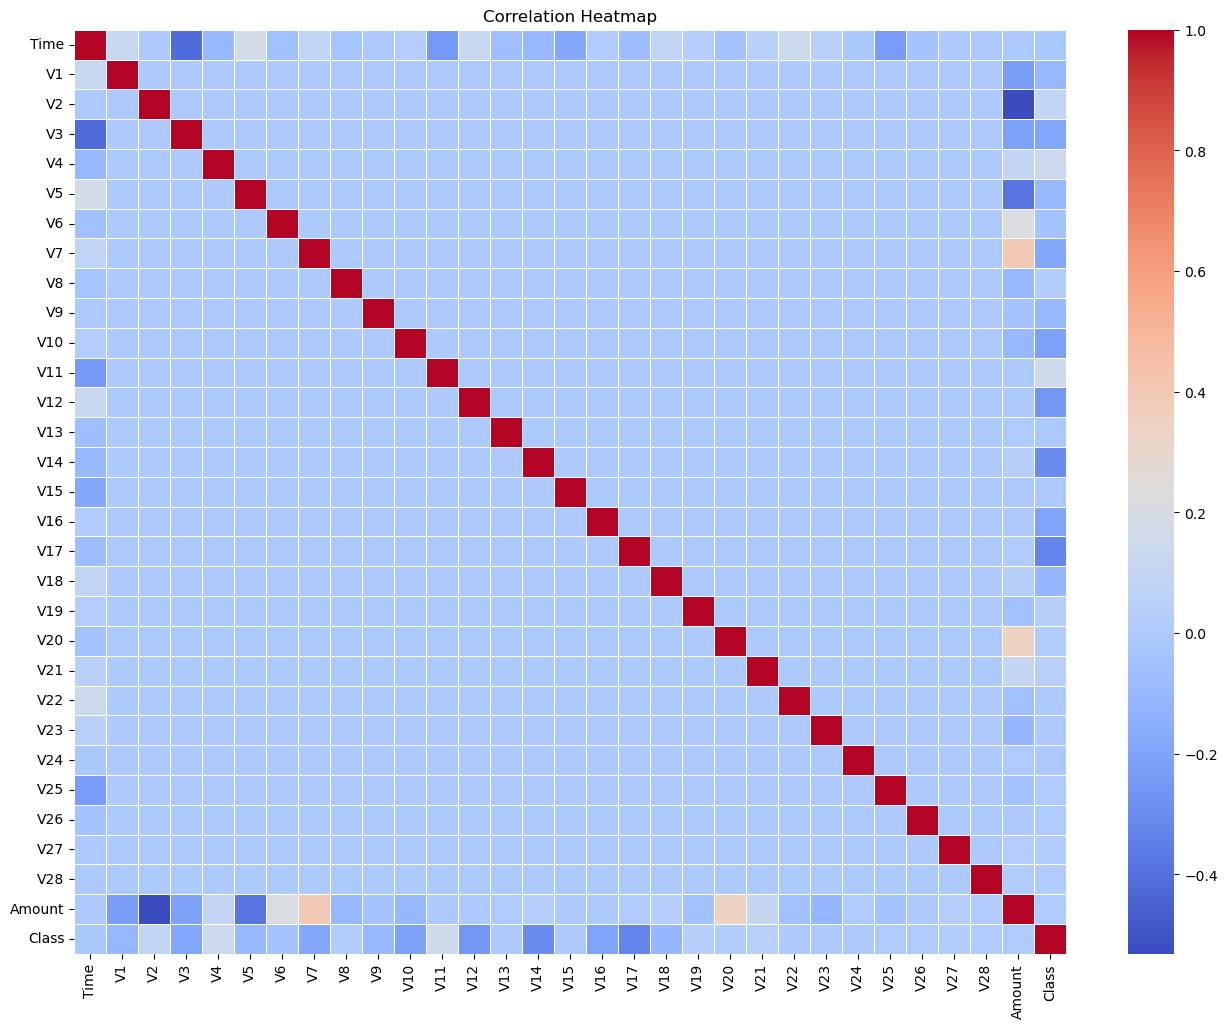

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix
correlation_matrix = df.corr()

# Step 2: Set figure size
plt.figure(figsize=(16, 12))

# Step 3: Plot the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)

# Step 4: Show the plot
plt.title("Correlation Heatmap")
plt.show()


# Data processing

# Splitting a DataFrame into Features (X) and Target (Y)

In this step, we’ll split the given DataFrame into two parts:

Features (X): These are the columns that we’ll use as input to our machine learning model. They represent the independent variables that help predict the target variable.

Target (Y): This is the column we want to predict. In our case, it’s the “Class” column.

## Instructions:

1. Get All Columns: First, let’s get a list of all the columns in the DataFrame. We’ll use this list to filter out the columns we don’t want.
2. Filter Columns: Remove any columns that are not relevant for our prediction.

In our case, we want to exclude the “Class” column from the features.
Store Variables:
X: Assign the remaining columns (excluding “Class”) to the variable X. These will be our features.
Y: Assign the “Class” column to the variable Y. This will be our target.
Print Shapes: Finally, print the shapes of X and Y to verify that everything is set up correctly.

In [15]:
# Step 1: Get all columns
all_columns = df.columns.tolist()

# Step 2: Exclude the 'Class' column from features
feature_columns = [col for col in all_columns if col != 'Class']

# Step 3: Create Features (X) and Target (Y)
X = df[feature_columns]
Y = df['Class']

# Step 4: Print shapes to verify
print("Shape of X (features):", X.shape)
print("Shape of Y (target):", Y.shape)


Shape of X (features): (284807, 30)
Shape of Y (target): (284807,)


## Split data into Train and test datset (20% test and 80% train)

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


In [17]:
# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


### Feature Scaling (Example)
#### Converting different units and magnitude data in one unit.
Note that this is general procedure, that is followed. This doesn't make a difference in this dataset, but it is done here as an example. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)  # convert all data into float data type
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

# 3.Machine Learning Model Building

#### We have clean data to build the Ml model. But which Machine learning algorithm is best for the data we have to find. The output is a categorical format so we will use supervised classification machine learning algorithms.

#### To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

#### import packages

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree Classifier
**[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

**[Read for finding accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)**

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model to training data
clf.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = clf.predict(X_test)

# Step 4: Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree Classifier:", round(accuracy * 100, 2), "%")


Accuracy of the Decision Tree Classifier: 99.91 %


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Step 2: Train the Decision Tree on the scaled data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_sc, y_train)

# Step 3: Make predictions
y_pred = clf.predict(X_test_sc)

# Step 4: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree with StandardScaler:", round(accuracy * 100, 2), "%")


Accuracy of Decision Tree with StandardScaler: 99.91 %


## Random Forest Classifier

In [22]:
# Random forest classifier, fit on Xtrain achieved by splitting
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9996137776061234

In [23]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
rf_clf_sc=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_sc.fit(X_train_sc,y_train)
y_pred_rf_sc=rf_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_rf_sc)

0.9996137776061234

##  AdaBoost Classifier

Treat as example

In [24]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

abd_clf.fit(X_train,y_train)
y_pred_abd=abd_clf.predict(X_test)
accuracy_score(y_test,y_pred_abd)

C:\Users\pakala.sip2025\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9991397773954567

In [25]:
# Train with Standard Scalar, fit on X_train_sc achieved by scaling
abd_clf_sc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME.R",
                             random_state=1,)
abd_clf_sc.fit(X_train_sc,y_train)
y_pred_abd_sc=abd_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_abd_sc)

C:\Users\pakala.sip2025\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9991397773954567

##  XGBoost Classifier

[Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [27]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.1/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 3.1/150.0 MB 5.4 MB/s eta 0:00:28
   - -------------------------------------- 4.5/150.0 MB 5.6 MB/s eta 0:00:27
   - -------------------------------------- 6.3/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 7.9/150.0 MB 6.6 MB/s eta 0:00:22
   -- ------------------------------------- 8.9/150.0 MB 6.4 MB/s eta 0:00:22
   -- ------------------------------------- 10.2/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 11.8/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 12.8/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 13.9/150.0 MB 6.2 MB/s eta 0:00:22
   ---- ----------------------------------- 15.5/150.0 MB 6.3 MB/s 

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Step 4: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost Classifier:", round(accuracy_xgb * 100, 2), "%")


C:\Users\pakala.sip2025\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy of XGBoost Classifier: 99.96 %


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the training features and transform both train & test sets
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Step 3: Train the Decision Tree model on scaled features
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train_sc, y_train)

# Step 4: Predict on the scaled test set
y_pred = clf.predict(X_test_sc)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after scaling:", round(accuracy * 100, 2), "%")


Accuracy after scaling: 99.95 %


## Confusion Matrix
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [30]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your model's predictions
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[56855     9]
 [   20    78]]


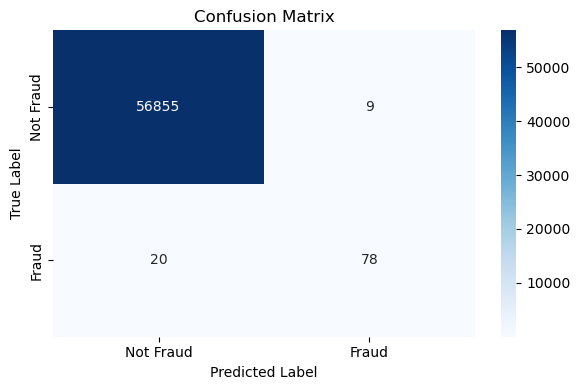

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



## Classification report of model

Print a classification report: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [32]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))




              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56864
       Fraud       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

